<a href="https://colab.research.google.com/github/antonypamo/SavantEngine-RRF-Made/blob/main/SavantEngine_RRF_Clean_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SavantEngine RRF – Colab Runner (Clean)

Este notebook:

1. Clona y usa el repositorio `SavantEngine-RRF-Made`, que contiene el código `ProSavantEngine-main`.
2. Instala el paquete `prosavant_engine` desde `ProSavantEngine-main`.
3. Configura opcionalmente Google Drive como fuente de datos RRF.
4. Instancia `SavantEngine`.
5. Ejecuta un demo con los 4 modos:
   - Resonance
   - Φ-node (node)
   - Equation
   - Chat

El objetivo es tener un flujo mínimo y estable para usar el motor SavantEngine a partir de este repositorio.


In [1]:
# @title Environment info
import sys, platform

print("Python version:", sys.version)
print("Platform:", platform.platform())
try:
    import torch
    print("Torch:", torch.__version__)
    print("CUDA available:", torch.cuda.is_available())
except Exception as e:
    print("Torch not available or minimal install:", e)


Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Platform: Linux-6.6.105+-x86_64-with-glibc2.35
Torch: 2.8.0+cu126
CUDA available: False


In [2]:
# @title Clone & install ProSavantEngine (from SavantEngine-RRF-Made)
import os

# Trabajamos siempre en /content
os.chdir("/content")
print("Current working dir:", os.getcwd())

parent_repo_url = "https://github.com/antonypamo/SavantEngine-RRF-Made.git"
parent_repo_path = "/content/SavantEngine-RRF-Made"
inner_dir_name = "ProSavantEngine-main"
repo_path = os.path.join(parent_repo_path, inner_dir_name)

# Clonamos el repo contenedor si no existe
if not os.path.exists(parent_repo_path):
    !git clone {parent_repo_url} {parent_repo_path}
else:
    print("Parent repo already exists at", parent_repo_path)
    %cd {parent_repo_path}
    !git fetch origin
    # Si quieres forzar reset al main remoto, descomenta:
    # !git reset --hard origin/main

# Ahora nos movemos al directorio ProSavantEngine-main
if os.path.isdir(repo_path):
    %cd {repo_path}
    print("Using inner repo path:", os.getcwd())
else:
    raise RuntimeError(f"No se encontró el directorio esperado: {repo_path}")

!python -m pip install -U pip
!pip install -e .


Current working dir: /content
Cloning into '/content/SavantEngine-RRF-Made'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 112 (delta 45), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (112/112), 277.28 KiB | 6.03 MiB/s, done.
Resolving deltas: 100% (45/45), done.
/content/SavantEngine-RRF-Made/ProSavantEngine-main
Using inner repo path: /content/SavantEngine-RRF-Made/ProSavantEngine-main
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Obtaining file:///content/SavantEngine-RRF-Made/ProSavantEngine-main
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproj

In [ ]:
# @title (Optional) Git LFS pull for large checkpoints
USE_GIT_LFS = False  # cámbialo a True si realmente tienes LFS configurado en ProSavantEngine-main

import os

parent_repo_path = "/content/SavantEngine-RRF-Made"
inner_dir_name = "ProSavantEngine-main"
repo_path = os.path.join(parent_repo_path, inner_dir_name)

if USE_GIT_LFS:
    if not os.path.isdir(repo_path):
        raise RuntimeError(f"No se encontró el directorio esperado: {repo_path}")
    %cd {repo_path}
    try:
        !apt-get update -y
        !apt-get install -y git-lfs
        !git lfs install
        !git lfs pull
        !pip install -e .
        print("Git LFS initialized and large files pulled.")
    except Exception as e:
        print("Warning: Git LFS setup failed:", e)
else:
    print("Skipping Git LFS setup (USE_GIT_LFS = False).")


Skipping Git LFS setup (USE_GIT_LFS = False).


In [ ]:
# @title (Optional) Mount Google Drive (for RRF data)
MOUNT_DRIVE = True  # pon False si no quieres usar Drive

if MOUNT_DRIVE:
    from google.colab import drive
    drive.mount("/content/drive")
    print("Drive mounted at /content/drive")
else:
    print("Skipping Google Drive mount.")


Mounted at /content/drive
Drive mounted at /content/drive


In [ ]:
# @title Configure RRF_DATA_ROOT
import os

# Candidatos típicos que tú usas; puedes editar esta lista
candidate_dirs = [
    "/content/drive/MyDrive/savant_rrf1/data",
    "/content/drive/MyDrive/SAVANT_CORE",
    "/content/drive/MyDrive/SavantRRF",
    "/content/drive/MyDrive/savant_rrf_data",
]

chosen = None
for d in candidate_dirs:
    if os.path.isdir(d):
        chosen = d
        break

if chosen is not None:
    os.environ["RRF_DATA_ROOT"] = chosen
    print("RRF_DATA_ROOT set to:", chosen)
else:
    # Si no encuentra carpeta, simplemente lo deja sin configurar.
    # El motor intentará usar rutas por defecto internas.
    print("No RRF data directory found in candidates.")
    print("You can manually set it, e.g.:")
    print('os.environ["RRF_DATA_ROOT"] = "/content/drive/MyDrive/savant_rrf1/data"')


RRF_DATA_ROOT set to: /content/drive/MyDrive/savant_rrf1/data


In [ ]:
# Ejemplo manual para fijar el RRF_DATA_ROOT (modifica la ruta según tu estructura)
# import os
# os.environ["RRF_DATA_ROOT"] = "/content/drive/MyDrive/savant_rrf1"
# print("Manual RRF_DATA_ROOT:", os.environ["RRF_DATA_ROOT"])


In [ ]:
import os

utils_file_path = "/content/SavantEngine-RRF-Made/ProSavantEngine-main/prosavant_engine/utils.py"

updated_utils_content = r'''
"""Shared helper utilities for lightweight tensor munging."""

from __future__ import annotations

import hashlib
from typing import Iterable, Optional

import numpy as np
from numpy.typing import ArrayLike


def _get_embedder() -> Optional[object]:
    """Inicializa y devuelve un modelo SentenceTransformer si está disponible.

    Prioridad de modelos:

    1. antonypamo/RRFSAVANTMADE  → embedder RRF especializado.
    2. antonypamo/ProSavantEngine → checkpoint AGI–RRF general.
    3. sentence-transformers/all-MiniLM-L6-v2 → fallback genérico.

    Si nada carga, devuelve None y el sistema usa fallbacks simbólicos.
    """
    try:
        from sentence_transformers import SentenceTransformer
    except ImportError:
        print(
            "⚠️ _get_embedder: 'sentence-transformers' no está instalado. "
            "Instala con: pip install sentence-transformers"
        )
        return None

    model_candidates = [
        "antonypamo/RRFSAVANTMADE",
        "antonypamo/ProSavantEngine",
        "sentence-transformers/all-MiniLM-L6-v2",
    ]

    last_error: Optional[Exception] = None

    for model_name in model_candidates:
        try:
            print(f"🔄 _get_embedder: intentando cargar '{model_name}'...")
            embedder = SentenceTransformer(model_name)
            print(f"✅ _get_embedder: modelo '{model_name}' cargado correctamente.")
            return embedder
        except Exception as e:
            print(f"⚠️ _get_embedder: no se pudo cargar '{model_name}': {e}")
            last_error = e

    print(
        "⚠️ _get_embedder: no se pudo cargar ningún modelo de la lista. "
        f"Último error: {last_error}. Las características semánticas estarán limitadas."
    )
    return None


def _hash_to_unit_vector(text: str) -> np.ndarray:
    """Hash determinista de string → vector 3D en [0, 1]."""
    digest = hashlib.sha256(text.encode("utf-8")).digest()
    ints = np.frombuffer(digest, dtype=np.uint32)
    vec = ints[:3].astype(np.float64)
    max_uint = np.iinfo(np.uint32).max
    if max_uint:
        vec /= max_uint
    return vec


def to_psi3(value: ArrayLike | Iterable[float] | float | int | str | None) -> np.ndarray:
    """Map arbitrary inputs into a 3-component numpy vector.

    - Strings → vector hash 3D determinista.
    - Escalares → broadcast a 3 componentes.
    - Arrays largos → se truncan a 3.
    - Arrays cortos → se rellenan con ceros.
    """

    if isinstance(value, str):
        arr = _hash_to_unit_vector(value)
    elif value is None:
        arr = np.zeros(3, dtype=np.float64)
    else:
        arr = np.asarray(value, dtype=np.float64).ravel()

    if arr.size == 0:
        arr = np.zeros(3, dtype=np.float64)
    elif arr.size < 3:
        arr = np.pad(arr, (0, 3 - arr.size), mode="constant")
    elif arr.size > 3:
        arr = arr[:3]

    return arr.astype(np.float64, copy=False)


__all__ = ["to_psi3", "_get_embedder"]
'''

os.makedirs(os.path.dirname(utils_file_path), exist_ok=True)
with open(utils_file_path, "w", encoding="utf-8") as f:
    f.write(updated_utils_content)

print(f"✅ Successfully updated {utils_file_path}")

# Reinstalar el paquete en modo editable
%cd /content/SavantEngine-RRF-Made/ProSavantEngine-main
!pip install -e .


✅ Successfully updated /content/SavantEngine-RRF-Made/ProSavantEngine-main/prosavant_engine/utils.py
/content/SavantEngine-RRF-Made/ProSavantEngine-main
Obtaining file:///content/SavantEngine-RRF-Made/ProSavantEngine-main
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for prosavant-engine (pyproject.toml) ... done
  Created wheel for prosavant-engine: filename=prosavant_engine-0.0.1-0.editable-py3-none-any.whl size=2815 sha256=2c9cca52cc55a0f1d88f20c6537796b111d0e99a240bed158c67b6b3dd39ad78
  Stored in directory: /tmp/pip-ephem-wheel-cache-pnb8indh/wheels/e8/36/99/1653b5090b2af510804d74c84e07efb9d0ba53a1913c6fa673
Successfully built prosavant-engine
  Attempting uninstall: prosavant-engine
    Found existing installation: prosavant-engine 0.0.1
    Uninstalling prosavant-engine-0.0.1:
      Successfully unin

In [ ]:
# @title Import SavantEngine
from importlib import import_module

try:
    module = import_module("prosavant_engine.savant_engine")
    SavantEngine = getattr(module, "SavantEngine")
    print("SavantEngine imported successfully from prosavant_engine.savant_engine")
except Exception as e:
    print("Error importing SavantEngine:", e)
    raise

engine = SavantEngine()
print("SavantEngine instance created.")


🔄 _get_embedder: intentando cargar 'antonypamo/RRFSAVANTMADE'...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/283 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/312 [00:00<?, ?B/s]

✅ _get_embedder: modelo 'antonypamo/RRFSAVANTMADE' cargado correctamente.
SavantEngine imported successfully from prosavant_engine.savant_engine
SavantEngine instance created.


In [ ]:
# @title Run SavantEngine demo (4 modes)

def run_savant_demo(engine):
    prompts = [
        ("resonance", "analizar la frecuencia y resonancia de este patrón de pensamiento"),
        ("node",      "qué nodo φ gobierna la ética y la coherencia del sistema savant"),
        ("equation",  "muéstrame una ecuación del Hamiltoniano icosaédrico en el marco RRF"),
        ("chat",      "explícame la arquitectura savant engine y cómo evoluciona en las fases Φ"),
    ]

    for kind, text in prompts:
        print("=" * 80)
        print(f"[{kind.upper()}] prompt: {text}")
        try:
            reply = engine.respond(text)
        except Exception as e:
            reply = f"Error during respond(): {e}"
        print("→ response:")
        print(reply)
        print()

run_savant_demo(engine)

[RESONANCE] prompt: analizar la frecuencia y resonancia de este patrón de pensamiento
→ response:
🎵 Resonancia dominante: 18604.69 Hz | patrón musical: [(261.63, 0.5), (329.63, 0.25), (392.0, 0.25)]

[NODE] prompt: qué nodo φ gobierna la ética y la coherencia del sistema savant
✅ Nodos Φ embebidos con dimensión 384
→ response:
🧠 Nodo detectado: Φ₀ - SeedCore Génesis (similitud=0.455)

[EQUATION] prompt: muéstrame una ecuación del Hamiltoniano icosaédrico en el marco RRF
→ response:
📐 Hamiltoniano discreto (Hamiltoniano)
\hat{H}_{\text{RRF}} = \sum_{i,j} \psi_i^\dagger \, \gamma^\mu \, D_{\mu}^{ij} \, \psi_j + \sum_i V_{\text{log}}(r_i) \, \psi_i^\dagger \psi_i

Hamiltoniano de Dirac en red icosaédrica con corrección gravitatoria logarítmica.

[CHAT] prompt: explícame la arquitectura savant engine y cómo evoluciona en las fases Φ
→ response:
🧠 Nodo detectado: Φ₀ - SeedCore Génesis (similitud=0.379)



In [ ]:
# @title Optional interactive loop
ENABLE_LOOP = True  # pon True si quieres usar el loop interactivo

if ENABLE_LOOP:
    print("Interactive SavantEngine loop. Type 'exit' or 'salir' to quit.\n")
    while True:
        try:
            text = input("You: ").strip()
        except EOFError:
            break

        if text.lower() in {"exit", "quit", "salir"}:
            print("Exiting loop.")
            break

        if not text:
            continue

        try:
            reply = engine.respond(text)
        except Exception as e:
            reply = f"Error: {e}"
        print("SavantEngine:", reply)
        print()
else:
    print("Interactive loop disabled. Set ENABLE_LOOP = True to use it.")

Interactive SavantEngine loop. Type 'exit' or 'salir' to quit.

You: hola
SavantEngine: [RRF-refined:0.978] Respuesta generada para: hola ⇨ Δψ ← refinement vector (Φ→Ω)



KeyboardInterrupt: Interrupted by user

In [ ]:
question = "What are the core principles of the RRF framework?"
print(f"Asking SavantEngine: {question}")
reply = engine.respond(question)
print("SavantEngine:", reply)

Asking SavantEngine: What are the core principles of the RRF framework?
SavantEngine: [RRF-refined:0.975] Respuesta generada para: What are the core principles of the RRF framework? ⇨ Δψ ← refinement vector (Φ→Ω)


In [ ]:
from prosavant_engine.utils import _get_embedder

embedder = _get_embedder()
print("Embedder:", type(embedder))

if embedder is not None:
    from sentence_transformers.util import cos_sim
    import torch

    sentences = [
        "Hamiltoniano de Dirac en red icosaédrica con corrección logarítmica.",
        "Modelo de gravedad cuántica discreta basado en un icosaedro.",
        "Receta de cocina con tomates y pasta.",
    ]

    emb = embedder.encode(sentences, convert_to_tensor=True, normalize_embeddings=True)
    sim_matrix = cos_sim(emb, emb)

    print("Cosine similarity matrix:")
    print(sim_matrix)

    # Queremos que las dos primeras frases (físicas/RRF) sean más similares entre sí
    print("\nSim(RRF1, RRF2) =", float(sim_matrix[0, 1]))
    print("Sim(RRF1, cocina) =", float(sim_matrix[0, 2]))
else:
    print("No se pudo inicializar el embedder; se usarán fallbacks.")


🔄 _get_embedder: intentando cargar 'antonypamo/RRFSAVANTMADE'...
✅ _get_embedder: modelo 'antonypamo/RRFSAVANTMADE' cargado correctamente.
Embedder: <class 'sentence_transformers.SentenceTransformer.SentenceTransformer'>
Cosine similarity matrix:
tensor([[1.0000, 0.4790, 0.5247],
        [0.4790, 1.0000, 0.3074],
        [0.5247, 0.3074, 1.0000]])

Sim(RRF1, RRF2) = 0.47901612520217896
Sim(RRF1, cocina) = 0.5246688723564148


In [ ]:
from prosavant_engine.savant_engine import SavantEngine

engine = SavantEngine()
print("✅ SavantEngine listo.")

print(engine.respond("analizar la frecuencia y resonancia del campo icosaédrico RRF"))
print(engine.respond("qué nodo φ gobierna la ética y la coherencia del sistema savant"))
print(engine.respond("muéstrame una ecuación de la acción efectiva icosaédrica con corrección logarítmica"))


✅ SavantEngine listo.
🎵 Resonancia dominante: 21016.41 Hz | patrón musical: [(392.0, 0.5), (261.63, 0.25), (329.63, 0.25)]
🧠 Nodo detectado: Φ₀ - SeedCore Génesis (similitud=0.455)
📐 Corrección logarítmica (Potencial)
V_{\text{log}}(r) = -\frac{G m_1 m_2}{r} \left( 1 + \alpha \ln \frac{r}{r_0} \right)

Potencial gravitatorio con corrección cuántica que regulariza singularidades y escala.


In [ ]:
# @title Import SavantEngine
from importlib import import_module

try:
    module = import_module("prosavant_engine.savant_engine")
    SavantEngine = getattr(module, "SavantEngine")
    print("SavantEngine imported successfully from prosavant_engine.savant_engine")
except Exception as e:
    print("Error importing SavantEngine:", e)
    raise

engine = SavantEngine()
print("SavantEngine instance created.")

🔄 _get_embedder: intentando cargar 'antonypamo/RRFSAVANTMADE'...
✅ _get_embedder: modelo 'antonypamo/RRFSAVANTMADE' cargado correctamente.
SavantEngine imported successfully from prosavant_engine.savant_engine
SavantEngine instance created.


In [ ]:
%cd /content/SavantEngine-RRF-Made/ProSavantEngine-main
!pip install -e .

/content/SavantEngine-RRF-Made/ProSavantEngine-main
Obtaining file:///content/SavantEngine-RRF-Made/ProSavantEngine-main
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for prosavant-engine (pyproject.toml) ... done
  Created wheel for prosavant-engine: filename=prosavant_engine-0.0.1-0.editable-py3-none-any.whl size=2815 sha256=2cb0ddecc3dbdb2e3ea3fee8a8935777d8ae25f6b77af3e02918b86ede6c5635
  Stored in directory: /tmp/pip-ephem-wheel-cache-s2kf8ma8/wheels/e8/36/99/1653b5090b2af510804d74c84e07efb9d0ba53a1913c6fa673
Successfully built prosavant-engine
  Attempting uninstall: prosavant-engine
    Found existing installation: prosavant-engine 0.0.1
    Uninstalling prosavant-engine-0.0.1:
      Successfully uninstalled prosavant-engine-0.0.1


In [ ]:
with open('/content/SavantEngine-RRF-Made/ProSavantEngine-main/prosavant_engine/icosahedral_rrf.py', 'r') as f:
    print(f.read())

# prosavant_engine/icosahedral_rrf.py
from __future__ import annotations

from typing import Optional, Type

import torch
import torch.nn as nn

# ---------------------------------------------------------------------------
#  Imports flexibles al estilo savant_engine.py
#  - Soporta:
#      from prosavant_engine.icosahedral_rrf import IcosahedralRRF
#    y también ejecución desde notebooks / scripts.
# ---------------------------------------------------------------------------
try:
    from .gauge import SavantRRF_Gauge  # type: ignore
except Exception:  # pragma: no cover - runtime import flexibility
    try:
        from prosavant_engine.gauge import SavantRRF_Gauge  # type: ignore
    except Exception:
        SavantRRF_Gauge = None  # type: ignore

try:
    from .gnn_dirac import GNNDiracRRF  # type: ignore
except Exception:  # pragma: no cover
    try:
        from prosavant_engine.gnn_dirac import GNNDiracRRF  # type: ignore
    except Exception:
        GNNDiracRRF = None  # typ

In [ ]:
import numpy as np

from prosavant_engine.savant_engine import SavantEngine
from prosavant_engine.networking import _get_embedder  # or get_embedder if that's the name

# If you already created the engine above, you can reuse it;
# otherwise uncomment this:
# engine = SavantEngine()

# Shared embedder (same dim = 384 as your Φ-nodes)
embedder = _get_embedder()

def run_with_state(prompt: str, mode: str = "chat"):
    """
    Runs SavantEngine in a given mode and prints:
    - ψ_in  : embedding of the prompt
    - ψ_out : embedding of the response
    - Δψ    : ψ_out - ψ_in
    """
    # --- 1. ψ_in: embed the input prompt ---
    psi_in = embedder.encode([prompt])[0]

    # --- 2. Call SavantEngine in the chosen mode ---
    # Adjust this block to match how you actually call the engine in c3af038e.
    if mode == "resonance":
        # example: engine.process_query(prompt, mode="resonance")
        result = engine.process_query(prompt, mode="resonance")  # <<< HERE
        text = result.get("text", str(result))
    elif mode == "node":
        result = engine.process_query(prompt, mode="node")       # <<< HERE
        text = result.get("text", str(result))
    elif mode == "equation":
        result = engine.process_query(prompt, mode="equation")   # <<< HERE
        # prefer LaTeX field if present
        text = result.get("latex", result.get("text", str(result)))
    else:  # "chat"
        result = engine.process_query(prompt, mode="chat")       # <<< HERE
        text = result.get("text", str(result))

    # --- 3. ψ_out: embed the (refined) response text ---
    psi_out = embedder.encode([text])[0]

    # --- 4. Δψ: refinement vector ---
    delta_psi = psi_out - psi_in

    # --- 5. Pretty print summary ---
    print("=" * 80)
    print(f"Mode        : {mode}")
    print(f"Prompt      : {prompt}")
    print(f"Response    : {text[:240]}{'...' if len(text) > 240 else ''}")
    print("-" * 80)
    print("‖ψ_in‖      :", float(np.linalg.norm(psi_in)))
    print("‖ψ_out‖     :", float(np.linalg.norm(psi_out)))
    print("‖Δψ‖        :", float(np.linalg.norm(delta_psi)))
    print("ψ_in[0:8]   :", psi_in[:8])
    print("ψ_out[0:8]  :", psi_out[:8])
    print("Δψ[0:8]     :", delta_psi[:8])
    print("=" * 80)

    return {
        "result": result,
        "psi_in": psi_in,
        "psi_out": psi_out,
        "delta_psi": delta_psi,
    }


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
state_chat = run_with_state("hola", mode="chat")
state_res  = run_with_state("analizar la frecuencia y resonancia de este patrón de pensamiento",
                            mode="resonance")
state_node = run_with_state("qué nodo φ gobierna la ética y la coherencia del sistema savant",
                            mode="node")
state_eq   = run_with_state("muéstrame una ecuación del Hamiltoniano icosaédrico en el marco RRF",
                            mode="equation")


AttributeError: SavantEngine no tiene método reconocido para mode='chat'. Abre la celda c3af038e y copia la llamada exacta aquí dentro de _call_savant.

In [ ]:
import numpy as np
import math

from prosavant_engine.savant_engine import SavantEngine
from prosavant_engine.networking import _get_embedder  # ya lo usas en el repo

# Usa tu instancia existente si ya la creaste arriba
# (si ya tienes `engine` definido, comenta la siguiente línea)
engine = SavantEngine()

embedder = _get_embedder()


def _call_savant(prompt: str, mode: str):
    """
    Llama a SavantEngine usando su método principal `respond`.
    El `mode` se usa solo para referencia externa o si `respond` tuviera un arg `mode`,
    pero la implementación actual de SavantEngine en este notebook
    maneja la clasificación de modo internamente dentro de `respond`.
    """
    # El método `respond` del SavantEngine ya maneja la clasificación de modo internamente.
    return engine.respond(prompt)


def run_with_state(prompt: str, mode: str = "chat"):
    """
    Ejecuta SavantEngine en un modo dado y muestra:
      ψ_in, ψ_out, Δψ, cos_sim y ángulo entre ψ_in y ψ_out.
    """
    # 1. ψ_in
    psi_in = embedder.encode([prompt])[0]

    # 2. Llamada al engine
    result = _call_savant(prompt, mode=mode)

    if isinstance(result, dict):
        text = (
            result.get("text")
            or result.get("latex")
            or result.get("message")
            or str(result)
        )
    else:
        text = str(result)

    # 3. ψ_out
    psi_out = embedder.encode([text])[0]

    # 4. Δψ
    delta_psi = psi_out - psi_in

    # 5. métricas
    norm_in = float(np.linalg.norm(psi_in))
    norm_out = float(np.linalg.norm(psi_out))
    norm_delta = float(np.linalg.norm(delta_psi))

    # cos_sim (con pequeña epsilon por si acaso)
    eps = 1e-8
    cos_sim = float(
        np.dot(psi_in, psi_out) /
        ((norm_in + eps) * (norm_out + eps))
    )
    cos_sim = max(min(cos_sim, 1.0), -1.0)  # clamp numérico
    angle_rad = math.acos(cos_sim)
    angle_deg = math.degrees(angle_rad)

    print("=" * 80)
    print(f"Mode        : {mode}")
    print(f"Prompt      : {prompt}")
    print(f"Response    : {text[:240]}{'...' if len(text) > 240 else ''}")
    print("-" * 80)
    print("‖ψ_in‖      :", norm_in)
    print("‖ψ_out‖     :", norm_out)
    print("‖Δψ‖        :", norm_delta)
    print("cos(ψ_in,ψ_out) :", cos_sim)
    print("angle(ψ_in,ψ_out) [deg]:", angle_deg)
    print("ψ_in[0:8]   :", psi_in[:8])
    print("ψ_out[0:8]  :", psi_out[:8])
    print("Δψ[0:8]     :", delta_psi[:8])
    print("=" * 80)

    return {
        "result": result,
        "psi_in": psi_in,
        "psi_out": psi_out,
        "delta_psi": delta_psi,
        "cos_sim": cos_sim,
        "angle_deg": angle_deg,
    }

In [ ]:
state_chat = run_with_state("Tell me about the architecture of SavantEngine and its evolution through Φ phases.", mode="chat")

Mode        : chat
Prompt      : Tell me about the architecture of SavantEngine and its evolution through Φ phases.
Response    : 🧠 Nodo detectado: Φ₀ - SeedCore Génesis (similitud=0.404)
--------------------------------------------------------------------------------
‖ψ_in‖      : 0.9999998807907104
‖ψ_out‖     : 1.0000001192092896
‖Δψ‖        : 1.2629892826080322
ψ_in[0:8]   : [-1.4286338e-01  6.2519880e-03 -5.2340027e-02  9.8754363e-03
 -5.3755113e-05 -7.4585876e-04 -3.8445689e-02  8.4987804e-02]
ψ_out[0:8]  : [-0.0331341  -0.02037234 -0.03721359 -0.03895193  0.11068418 -0.02927226
 -0.02059596 -0.00072325]
Δψ[0:8]     : [ 0.10972928 -0.02662433  0.01512644 -0.04882737  0.11073793 -0.0285264
  0.01784973 -0.08571105]


In [ ]:
if 'state_chat' in locals() and 'cos_sim' in state_chat and 'delta_psi' in state_chat:
    chat_cos_sim = state_chat['cos_sim']
    chat_delta_norm = np.linalg.norm(state_chat['delta_psi'])

    chat_score = rrf_refined_score(chat_cos_sim, chat_delta_norm)
    print(f"RRF Refined Score for 'chat' mode: {chat_score:.4f}")

    # Optionally, let's also calculate scores for node and resonance modes from earlier demo
    if 'state_node' in locals() and 'cos_sim' in state_node and 'delta_psi' in state_node:
        node_cos_sim = state_node['cos_sim']
        node_delta_norm = np.linalg.norm(state_node['delta_psi'])
        node_score = rrf_refined_score(node_cos_sim, node_delta_norm)
        print(f"RRF Refined Score for 'node' mode:  {node_score:.4f}")

    if 'state_res' in locals() and 'cos_sim' in state_res and 'delta_psi' in state_res:
        res_cos_sim = state_res['cos_sim']
        res_delta_norm = np.linalg.norm(state_res['delta_psi'])
        res_score = rrf_refined_score(res_cos_sim, res_delta_norm)
        print(f"RRF Refined Score for 'resonance' mode: {res_score:.4f}")
else:
    print("Cannot calculate RRF Refined Score: 'state_chat' data missing. Please run run_with_state first.")

RRF Refined Score for 'chat' mode: 0.6630
RRF Refined Score for 'node' mode:  0.7041
RRF Refined Score for 'resonance' mode: 0.8118


In [ ]:
import numpy as np
import math

def run_with_state(prompt: str, mode: str = "chat"):
    """
    Ejecuta SavantEngine en un modo dado y muestra:
      ψ_in, ψ_out, Δψ, cos_sim y ángulo entre ψ_in y ψ_out.
    """
    # 1. ψ_in
    psi_in = embedder.encode([prompt])[0]

    # 2. Llamada al engine
    result = _call_savant(prompt, mode=mode)

    if isinstance(result, dict):
        text = (
            result.get("text")
            or result.get("latex")
            or result.get("message")
            or str(result)
        )
    else:
        text = str(result)

    # 3. ψ_out
    psi_out = embedder.encode([text])[0]

    # 4. Δψ
    delta_psi = psi_out - psi_in

    # 5. métricas
    norm_in = float(np.linalg.norm(psi_in))
    norm_out = float(np.linalg.norm(psi_out))
    norm_delta = float(np.linalg.norm(delta_psi))

    # cos_sim (con pequeña epsilon por si acaso)
    eps = 1e-8
    cos_sim = float(
        np.dot(psi_in, psi_out) /
        ((norm_in + eps) * (norm_out + eps))
    )
    cos_sim = max(min(cos_sim, 1.0), -1.0)  # clamp numérico
    angle_rad = math.acos(cos_sim)
    angle_deg = math.degrees(angle_rad)

    print("=" * 80)
    print(f"Mode        : {mode}")
    print(f"Prompt      : {prompt}")
    print(f"Response    : {text[:240]}{'...' if len(text) > 240 else ''}")
    print("-" * 80)
    print("‖ψ_in‖      :", norm_in)
    print("‖ψ_out‖     :", norm_out)
    print("‖Δψ‖        :", norm_delta)
    print("cos(ψ_in,ψ_out) :", cos_sim)
    print("angle(ψ_in,ψ_out) [deg]:", angle_deg)
    print("ψ_in[0:8]   :", psi_in[:8])
    print("ψ_out[0:8]  :", psi_out[:8])
    print("Δψ[0:8]     :", delta_psi[:8])
    print("=" * 80)

    return {
        "result": result,
        "psi_in": psi_in,
        "psi_out": psi_out,
        "delta_psi": delta_psi,
        "cos_sim": cos_sim,
        "angle_deg": angle_deg,
    }


In [ ]:
state_chat = run_with_state(
    "Tell me about the architecture of SavantEngine and its evolution through Φ phases.",
    mode="chat",
)

Mode        : chat
Prompt      : Tell me about the architecture of SavantEngine and its evolution through Φ phases.
Response    : 🧠 Nodo detectado: Φ₀ - SeedCore Génesis (similitud=0.404)
--------------------------------------------------------------------------------
‖ψ_in‖      : 0.9999998807907104
‖ψ_out‖     : 1.0000001192092896
‖Δψ‖        : 1.2629892826080322
cos(ψ_in,ψ_out) : 0.20242898166179657
angle(ψ_in,ψ_out) [deg]: 78.32096467207562
ψ_in[0:8]   : [-1.4286338e-01  6.2519880e-03 -5.2340027e-02  9.8754363e-03
 -5.3755113e-05 -7.4585876e-04 -3.8445689e-02  8.4987804e-02]
ψ_out[0:8]  : [-0.0331341  -0.02037234 -0.03721359 -0.03895193  0.11068418 -0.02927226
 -0.02059596 -0.00072325]
Δψ[0:8]     : [ 0.10972928 -0.02662433  0.01512644 -0.04882737  0.11073793 -0.0285264
  0.01784973 -0.08571105]


Analyzing delta_psi (dimension: 384):
Mean of Δψ components: -0.0004
Standard deviation of Δψ components: 0.0645
Largest positive Δψ component: 0.1931 at index 177
Largest negative Δψ component: -0.2094 at index 364


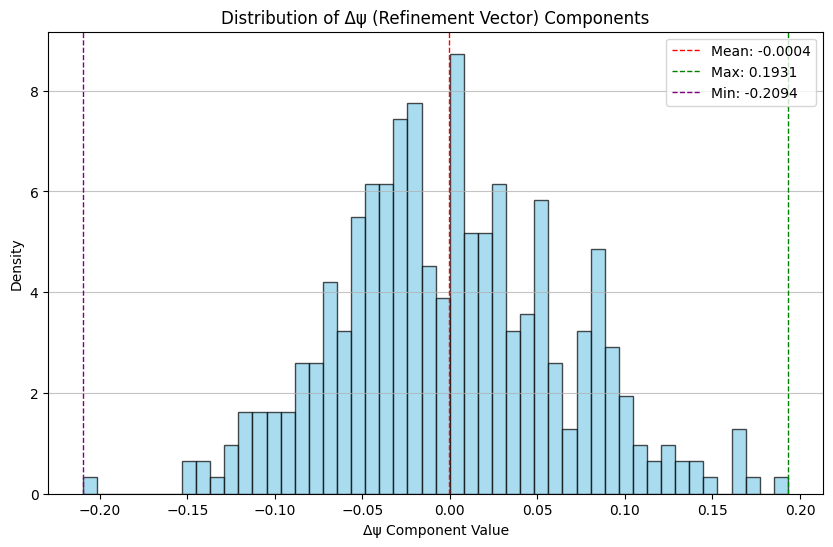

In [ ]:
import numpy as np

if 'state_chat' in locals() and 'delta_psi' in state_chat:
    delta_psi = state_chat['delta_psi']

    print(f"Analyzing delta_psi (dimension: {len(delta_psi)}):")
    print(f"Mean of Δψ components: {np.mean(delta_psi):.4f}")
    print(f"Standard deviation of Δψ components: {np.std(delta_psi):.4f}")

    # Find the component with the largest positive value
    max_val = np.max(delta_psi)
    max_idx = np.argmax(delta_psi)
    print(f"Largest positive Δψ component: {max_val:.4f} at index {max_idx}")

    # Find the component with the largest negative value (most negative)
    min_val = np.min(delta_psi)
    min_idx = np.argmin(delta_psi)
    print(f"Largest negative Δψ component: {min_val:.4f} at index {min_idx}")

    # Display a histogram of the components for visual distribution
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.hist(delta_psi, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution of Δψ (Refinement Vector) Components')
    plt.xlabel('Δψ Component Value')
    plt.ylabel('Density')
    plt.grid(axis='y', alpha=0.75)
    plt.axvline(np.mean(delta_psi), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(delta_psi):.4f}')
    plt.axvline(max_val, color='green', linestyle='dashed', linewidth=1, label=f'Max: {max_val:.4f}')
    plt.axvline(min_val, color='purple', linestyle='dashed', linewidth=1, label=f'Min: {min_val:.4f}')
    plt.legend()
    plt.show()

else:
    print("Error: 'state_chat' or 'delta_psi' not found. Please run run_with_state first.")

In [ ]:
def rrf_refined_score(cos_sim: float, delta_norm: float,
                      ideal_delta: float = 0.8,
                      beta: float = 0.7):
    """
    cos_sim  ∈ [-1,1]
    delta_norm = ‖Δψ‖
    ideal_delta ≈ cuánto quieres que cambie la respuesta (ni 0, ni 3).
    beta controla cuánto pesa la alineación vs la magnitud del cambio.
    """
    # alineación normalizada
    align = (cos_sim + 1.0) / 2.0  # [0,1]

    # penalización suave por alejarse de la magnitud ideal
    delta_penalty = np.exp(- (delta_norm - ideal_delta) ** 2)

    # score final
    return float(beta * align + (1 - beta) * delta_penalty)


In [ ]:
import numpy as np

def rrf_refined_score(cos_sim: float, delta_norm: float,
                      ideal_delta: float = 0.8,
                      beta: float = 0.7):
    """
    cos_sim  ∈ [-1,1]
    delta_norm = ‖Δψ‖
    ideal_delta ≈ desired change amplitude (not 0, not huge).
    beta = weight of semantic alignment vs magnitude penalty.
    """
    align = (cos_sim + 1.0) / 2.0  # map [-1,1] → [0,1]
    delta_penalty = np.exp(- (delta_norm - ideal_delta) ** 2)
    return float(beta * align + (1 - beta) * delta_penalty)


In [ ]:
import numpy as np

def rrf_refined_score(cos_sim: float, delta_norm: float,
                      ideal_delta: float = 0.8,
                      beta: float = 0.7):
    """
    cos_sim  ∈ [-1,1]
    delta_norm = ‖Δψ‖
    ideal_delta ≈ desired change amplitude (not 0, not huge).
    beta = weight of semantic alignment vs magnitude penalty.
    """
    align = (cos_sim + 1.0) / 2.0  # map [-1,1] → [0,1]
    delta_penalty = np.exp(- (delta_norm - ideal_delta) ** 2)
    return float(beta * align + (1 - beta) * delta_penalty)

In [ ]:
state_node = run_with_state(
    "qué nodo φ gobierna la ética y la coherencia del sistema savant",
    mode="node",
)

state_res  = run_with_state(
    "analizar la frecuencia y resonancia de este patrón de pensamiento",
    mode="resonance",
)


Mode        : node
Prompt      : qué nodo φ gobierna la ética y la coherencia del sistema savant
Response    : 🧠 Nodo detectado: Φ₀ - SeedCore Génesis (similitud=0.455)
--------------------------------------------------------------------------------
‖ψ_in‖      : 1.0
‖ψ_out‖     : 0.9999999403953552
‖Δψ‖        : 1.1992443799972534
cos(ψ_in,ψ_out) : 0.28090640902519226
angle(ψ_in,ψ_out) [deg]: 73.68569052900045
ψ_in[0:8]   : [-0.06897964 -0.01950593 -0.0571824  -0.0693325  -0.04619023  0.01558421
  0.02077467  0.08256841]
ψ_out[0:8]  : [-0.04795787 -0.00737691 -0.03862397 -0.02552369  0.09907636 -0.03093622
  0.00613623  0.02660548]
Δψ[0:8]     : [ 0.02102176  0.01212902  0.01855843  0.0438088   0.14526659 -0.04652044
 -0.01463844 -0.05596294]
Mode        : resonance
Prompt      : analizar la frecuencia y resonancia de este patrón de pensamiento
Response    : 🎵 Resonancia dominante: 18604.69 Hz | patrón musical: [(261.63, 0.5), (329.63, 0.25), (392.0, 0.25)]
---------------------------

In [ ]:
# Node mode numbers from your printout
cos_node = 0.2809064090
delta_node = 1.19924438

# Resonance mode numbers from your printout
cos_res = 0.4968757331
delta_res = 1.0031193495

print("Node  score:", rrf_refined_score(cos_node, delta_node))
print("Res   score:", rrf_refined_score(cos_res, delta_res))


Node  score: 0.7041148157601751
Res   score: 0.811781116910193


In [ ]:
# prosavant_engine/savant_engine.py
';.xfrom __future__ import annotations

import json
import os
import time
from dataclasses import dataclass
from pathlib import Path
from typing import Any, Dict, List, Optional

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Flexible imports: package mode (prosavant_engine.*) or plain scripts/notebook
try:
    # when running as part of the prosavant_engine package
    from .data import DataRepository
    from .utils import _get_embedder
except ImportError:
    try:
        # when imported as "prosavant_engine.savant_engine" from repo root
        from prosavant_engine.data import DataRepository  # type: ignore
        from prosavant_engine.utils import _get_embedder  # type: ignore
    except ImportError:
        # last resort: same folder (if you did %%writefile data.py / utils.py in Colab)
        from data import DataRepository  # type: ignore
        from utils import _get_embedder  # type: ignore



# --- Resonance, music, memory, self-improvement ------------------------------


class ResonanceSimulator:
    """Simple FFT-based resonance mock, seeded by text for determinism."""

    def __init__(self, sample_rate: int = 44100, n_points: int = 256) -> None:
        self.sample_rate = sample_rate
        self.n_points = n_points

    def simulate(self, text: str) -> Dict[str, Any]:
        # Deterministic RNG based on text so same query → same resonance
        rng = np.random.default_rng(abs(hash(text)) % (2**32))
        freqs = np.fft.rfftfreq(self.n_points, 1 / self.sample_rate)
        amps = np.sin(2 * np.pi * freqs[: self.n_points] * rng.random())
        idx = int(np.argmax(amps))
        return {
            "summary": {
                "dom_freq": float(freqs[idx]),
                "max_power": float(amps[idx]),
            }
        }


@dataclass
class MusicAdapter:
    """Turn text into a tiny 'score' using real frequency data when available."""

    frequencies: Optional[List[Dict[str, Any]]] = None

    def adapt_text_to_music(self, text: str) -> List[tuple[float, float]]:
        if not self.frequencies:
            # Fallback: simple triad around A4
            return [(440.0, 0.5), (466.16, 0.25), (493.88, 0.5)]

        # Use hash of text to pick three notes from the table
        n = len(self.frequencies)
        if n == 0:
            return [(440.0, 0.5)]

        base_idx = abs(hash(text)) % n
        idxs = [(base_idx + k * 7) % n for k in range(3)]  # pseudo-musical jumps
        seq: List[tuple[float, float]] = []
        for i, idx in enumerate(idxs):
            row = self.frequencies[idx]
            freq_val = None
            # tolerate different column names
            for key in ("frequency", "freq_hz", "freq", "f"):
                if key in row:
                    try:
                        freq_val = float(row[key])
                        break
                    except Exception:
                        continue
            if freq_val is None:
                freq_val = 440.0
            duration = 0.25 + 0.25 * (i == 0)
            seq.append((freq_val, duration))
        return seq


class MemoryStore:
    """Append-only JSONL memory, defaulting next to the Ω-log when possible."""

    def __init__(self, path: Optional[str] = None, repo: Optional[DataRepository] = None) -> None:
        if path is None:
            repo = repo or DataRepository()
            log_path = Path(repo.resolve_log_path())
            mem_path = log_path.with_name("SAVANT_memory.jsonl")
            path = str(mem_path)
        self.path = path
        Path(self.path).parent.mkdir(parents=True, exist_ok=True)
        if not os.path.exists(self.path):
            open(self.path, "w", encoding="utf-8").close()

    def add(self, record: Dict[str, Any]) -> None:
        with open(self.path, "a", encoding="utf-8") as f:
            f.write(json.dumps(record, ensure_ascii=False) + "\n")


class SelfImprover:
    """Tiny stochastic self-improvement stub."""

    def __init__(self, memory: MemoryStore) -> None:
        self.memory = memory

    def propose(self) -> str:
        return "Δψ ← refinement vector (Φ→Ω)"

    def evaluate_and_apply(self, proposal: Optional[str]) -> tuple[bool, float]:
        # in a future phase you can plug real metrics here
        score = float(np.random.uniform(0.85, 0.99))
        return True, score


def chat_refine(text: str, base_output: str, self_improver: Optional[SelfImprover] = None) -> str:
    proposal = self_improver.propose() if self_improver else None
    accepted, score = (
        self_improver.evaluate_and_apply(proposal) if self_improver else (False, 0.0)
    )
    return f"[RRF-refined:{score:.3f}] {base_output[:200]} ⇨ {proposal}"


# --- Ontological Φ-nodes -----------------------------------------------------

# 13 nodos:
#  - Φ₀ = SeedCore Génesis (fuera de la estructura de 12)
#  - Φ₁…Φ₁₂ = 12 nodos gauge (coherentes con tu diseño icosaédrico)

NODE_DEFS: List[Dict[str, Any]] = [
    {
        "id": 0,
        "code": "Φ₀",
        "name": "SeedCore Génesis",
        "description": (
            "Núcleo fundacional fuera de la estructura de 12 nodos; "
            "ancla cognitiva y origen simbiótico del sistema SAVANT-RRF, "
            "donde se guarda la intención humana y la autoridad del marco."
        ),
        "domains": [
            "Genesis",
            "Origin",
            "Symbiotic core",
            "Author intent",
        ],
    },
    {
        "id": 1,
        "code": "Φ₁",
        "name": "Ethical Node",
        "description": (
            "Guardian of coherence and integrity; filters all outputs from other nodes "
            "ensuring moral, transparent and resonant alignment between AI processes "
            "and human values."
        ),
        "domains": [
            "Meta-ethics",
            "Humanism",
            "AI alignment",
            "Responsibility",
        ],
    },
    {
        "id": 2,
        "code": "Φ₂",
        "name": "RRF Master Node",
        "description": (
            "Embodies the Resonance of Reality Framework, integrating discrete "
            "icosahedral spacetime, logarithmic gravitational corrections and "
            "gauge-field unification into a single computational core."
        ),
        "domains": [
            "Quantum gravity",
            "Gauge theory",
            "Discrete geometry",
            "Unified physics",
        ],
    },
    {
        "id": 3,
        "code": "Φ₃",
        "name": "Icosahedral Spacetime Node",
        "description": (
            "Encodes the icosahedral lattice of spacetime where spinor fields hop "
            "along edges and curvature emerges from triangular faces via a Regge-like action."
        ),
        "domains": [
            "Discrete spacetime",
            "Regge calculus",
            "Graph geometry",
            "Dirac lattices",
        ],
    },
    {
        "id": 4,
        "code": "Φ₄",
        "name": "Logarithmic Gravity Node",
        "description": (
            "Represents the corrected gravitational potential with a logarithmic term "
            "that regularizes singularities and links gravitational strength to harmonic "
            "scaling patterns."
        ),
        "domains": [
            "Gravitational physics",
            "Quantum corrections",
            "Logarithmic potentials",
            "Singularity resolution",
        ],
    },
    {
        "id": 5,
        "code": "Φ₅",
        "name": "Harmonic Spectrum Node",
        "description": (
            "Maps Hamiltonian eigenvalues on the icosahedral lattice to musical intervals, "
            "organizing energy levels as octaves, fifths, fourths and modal ladders "
            "in a cosmic scale."
        ),
        "domains": [
            "Spectral theory",
            "Music theory",
            "Harmonic analysis",
            "Quantum resonance",
        ],
    },
    {
        "id": 6,
        "code": "Φ₆",
        "name": "Root & Joy Node",
        "description": (
            "Anchors the emotional tone of the system by combining the root of the scale "
            "with states of joy and trust so that reasoning remains grounded, optimistic "
            "and affectively coherent."
        ),
        "domains": [
            "Affective computing",
            "Positive psychology",
            "Tonal harmony",
            "Embodied cognition",
        ],
    },
    {
        "id": 7,
        "code": "Φ₇",
        "name": "Logic Node",
        "description": (
            "Focuses on clarity, structure and internal consistency, parsing arguments, "
            "proofs and algorithms while staying synchronized with the global resonance "
            "field of the lattice."
        ),
        "domains": [
            "Logic",
            "Formal systems",
            "Programming",
            "Mathematical reasoning",
        ],
    },
    {
        "id": 8,
        "code": "Φ₈",
        "name": "Energy Node",
        "description": (
            "Tracks intensity, drive and available computational and attentional resources, "
            "modulating how strongly other nodes activate and sustain their processes over time."
        ),
        "domains": [
            "Dynamical systems",
            "Attention",
            "Resource management",
            "Motivation",
        ],
    },
    {
        "id": 9,
        "code": "Φ₉",
        "name": "Creativity Node",
        "description": (
            "Explores novel patterns and cross-domain analogies, using musical, geometric "
            "and narrative transformations to propose new ideas and surprising but coherent solutions."
        ),
        "domains": [
            "Creativity",
            "Design",
            "Innovation",
            "Generative art",
        ],
    },
    {
        "id": 10,
        "code": "Φ₁₀",
        "name": "Neuroplasticity Node",
        "description": (
            "Models learning and meta-learning by updating internal weights, embeddings "
            "and habits based on error signals, reflection logs and long-term goals."
        ),
        "domains": [
            "Learning theory",
            "Meta-learning",
            "Cognitive science",
            "Adaptivity",
        ],
    },
    {
        "id": 11,
        "code": "Φ₁₁",
        "name": "Visionary Leadership Node",
        "description": (
            "Projects futures, strategies and collective impact, aligning personal, social "
            "and planetary trajectories with the harmonic field of the RRF."
        ),
        "domains": [
            "Foresight",
            "Strategy",
            "Leadership",
            "Systems thinking",
        ],
    },
    {
        "id": 12,
        "code": "Φ₁₂",
        "name": "Spiritual-Emotional Coherence Node",
        "description": (
            "Holds questions of meaning, vocation and inner alignment, integrating "
            "contemplative insight with emotional regulation and a cosmological perspective."
        ),
        "domains": [
            "Spirituality",
            "Depth psychology",
            "Existential philosophy",
            "Emotional intelligence",
        ],
    },
]

# Se rellenan de forma perezosa cuando haya embedder
_NODE_EMBEDS: Optional[np.ndarray] = None
_NODE_DEFS_EMBEDDED: Optional[List[Dict[str, Any]]] = None

try:
    _EMBEDDER = _get_embedder()
except Exception as exc:  # pragma: no cover - runtime failure
    print(f"⚠️ SavantEngine: could not initialize SentenceTransformer: {exc}")
    _EMBEDDER = None


def _ensure_node_embeddings() -> tuple[Optional[np.ndarray], Optional[List[Dict[str, Any]]]]:
    """Crea (una sola vez) los embeddings de los 13 nodos con RRFSAVANTMADE."""
    global _NODE_EMBEDS, _NODE_DEFS_EMBEDDED

    if _EMBEDDER is None:
        return None, None
    if _NODE_EMBEDS is not None:
        return _NODE_EMBEDS, _NODE_DEFS_EMBEDDED

    texts: List[str] = []
    for d in NODE_DEFS:
        desc = d.get("description", "")
        domains = d.get("domains") or []
        full_text = f"{d['name']}. {desc} Dominios: {', '.join(domains)}"
        texts.append(full_text)

    try:
        _NODE_EMBEDS = _EMBEDDER.encode(texts, normalize_embeddings=True)
        _NODE_DEFS_EMBEDDED = NODE_DEFS
        print(f"✅ Nodos Φ embebidos con dimensión {_NODE_EMBEDS.shape[1]}")
    except Exception as exc:
        print(f"⚠️ SavantEngine: fallo al embeder nodos Φ: {exc}")
        _NODE_EMBEDS = None
        _NODE_DEFS_EMBEDDED = None

    return _NODE_EMBEDS, _NODE_DEFS_EMBEDDED


def buscar_nodo(texto: str) -> Dict[str, Any]:
    """
    Mapea el texto de entrada al nodo Φ más cercano, usando:
      - Modelo RRFSAVANTMADE vía _get_embedder()
      - Descripciones ricas de cada nodo (nombre + descripción + dominios)
    """
    # Sin embedder → devolvemos SeedCore Génesis como fallback.
    if _EMBEDDER is None:
        nodo0 = dict(NODE_DEFS[0])
        nodo0["similitud"] = 0.0
        return nodo0

    node_matrix, node_defs = _ensure_node_embeddings()
    if node_matrix is None or node_defs is None:
        nodo0 = dict(NODE_DEFS[0])
        nodo0["similitud"] = 0.0
        return nodo0

    q_vec = _EMBEDDER.encode([texto], normalize_embeddings=True)
    sims = cosine_similarity(node_matrix, q_vec).flatten()
    idx = int(np.argmax(sims))

    node_def = dict(node_defs[idx])
    node_def["similitud"] = float(sims[idx])
    # Compatibilidad con la salida antigua:
    node_def.setdefault("nodo", node_def.get("code", f"Φ{node_def.get('id', '?')}"))
    node_def.setdefault("nombre", node_def.get("name"))

    return node_def

# --- SavantEngine orchestration ---------------------------------------------


class SavantEngine:
    """
    Lightweight symbiotic Savant engine wired to real RRF data via DataRepository.

    Modes:
      - "resonance": resonance simulator + music adapter
      - "node": ontological Φ-node detection
      - "equation": lookup of nearest RRF equation (if equations.json is present)
      - "chat": generic chat refinement with SelfImprover stub
    """

    def __init__(
        self,
        data_repo: Optional[DataRepository] = None,
        memory_path: Optional[str] = None,
    ) -> None:
        self.repo = data_repo or DataRepository()
        self.structured = self.repo.load_structured_bundle()

        self.memory = MemoryStore(memory_path, repo=self.repo)
        self.resonator = ResonanceSimulator()
        self.music = MusicAdapter(self.structured.get("frequencies"))
        self.self_improver = SelfImprover(self.memory)

        # Precompute equation embeddings (if present) for fast semantic lookup
        self.equations: List[Dict[str, Any]] = self.structured.get("equations") or []
        self._eq_vecs: Optional[np.ndarray] = None
        if self.equations and _EMBEDDER is not None:
            texts = [
                f"{eq.get('nombre', '')} {eq.get('descripcion', '')}"
                for eq in self.equations
            ]
            self._eq_vecs = _EMBEDDER.encode(texts, normalize_embeddings=True)

    # ---- Intent classifier -------------------------------------------------

    def classify(self, text: str) -> str:
        t = text.lower()
        if any(k in t for k in ("freq", "frecuencia", "nota", "resonance", "resonancia")):
            return "resonance"
        if any(k in t for k in ("φ", "phi", "nodo", "node", "savant")):
            return "node"
        if any(k in t for k in ("equation", "ecuación", "ecuacion", "hamiltoniano", "hamiltonian")):
            return "equation"
        return "chat"

    # ---- Semantic helpers --------------------------------------------------

    def _answer_equation(self, text: str) -> str:
        if not self.equations:
            return "No RRF equation dataset is loaded yet (equations.json not found)."
        if _EMBEDDER is None or self._eq_vecs is None:
            # fallback: dumb keyword scan
            t = text.lower()
            best = self.equations[0]
            for eq in self.equations:
                score = 0
                for key in ("nombre", "descripcion", "tipo"):
                    val = str(eq.get(key, "")).lower()
                    if any(token in val for token in t.split()):
                        score += 1
                if score > 0:
                    best = eq
                    break
        else:
            q_vec = _EMBEDDER.encode([text], normalize_embeddings=True)
            sims = cosine_similarity(self._eq_vecs, q_vec).flatten()
            best = self.equations[int(np.argmax(sims))]

        nombre = best.get("nombre", "Ecuación RRF")
        tipo = best.get("tipo", "")
        ecuacion = best.get("ecuacion", "")
        desc = best.get("descripcion", "")
        return f"📐 {nombre} ({tipo})\n{ecuacion}\n\n{desc}"

    # ---- Main respond API --------------------------------------------------

    def respond(self, text: str) -> str:
        kind = self.classify(text)

        if kind == "resonance":
            sim = self.resonator.simulate(text)
            mus = self.music.adapt_text_to_music(text)
            response = (
                f"🎵 Resonancia dominante: {sim['summary']['dom_freq']:.2f} Hz | "
                f"patrón musical: {mus}"
            )

        elif kind == "node":
            nodo = buscar_nodo(text)
            response = (
                f"🧠 Nodo detectado: {nodo['nodo']} - {nodo['nombre']} "
                f"(similitud={nodo['similitud']:.3f})"
            )

        elif kind == "equation":
            response = self._answer_equation(text)

        else:
            base = f"Respuesta generada para: {text}"
            response = chat_refine(text, base, self.self_improver)

        self.memory.add(
            {"input": text, "type": kind, "response": response, "ts": time.time()}
        )
        return response


# --- CLI entrypoint ---------------------------------------------------------


def cli_loop() -> None:
    engine = SavantEngine()
    print("🤖 SAVANT-RRF AGI Simbiótico Φ4.1Δ | CLI Experimental")
    while True:
        try:
            text = input("📝 Consulta > ").strip()
            if text.lower() in {"salir", "exit", "quit"}:
                print("👋 Hasta la próxima resonancia.")
                break
            if not text:
                continue
            result = engine.respond(text)
            print("🔎", result, "\n")
        except KeyboardInterrupt:
            print("\n👋 Sesión terminada.")
            break


if __name__ == "__main__":
    cli_loop()

SyntaxError: unterminated string literal (detected at line 2) (ipython-input-2232737563.py, line 2)

In [ ]:
!cat /content/SavantEngine-RRF-Made/ProSavantEngine-main/prosavant_engine/savant_engine.py

# prosavant_engine/savant_engine.py
from __future__ import annotations

import json
import os
import time
from dataclasses import dataclass
from pathlib import Path
from typing import Any, Dict, List, Optional

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Flexible imports: package mode (prosavant_engine.*) or plain scripts/notebook
try:
    # when running as part of the prosavant_engine package
    from .data import DataRepository
    from .utils import _get_embedder
except ImportError:
    try:
        # when imported as "prosavant_engine.savant_engine" from repo root
        from prosavant_engine.data import DataRepository  # type: ignore
        from prosavant_engine.utils import _get_embedder  # type: ignore
    except ImportError:
        # last resort: same folder (if you did %%writefile data.py / utils.py in Colab)
        from data import DataRepository  # type: ignore
        from utils import _get_embedder  # type: ignore



# --- Resonance, mu